Import the required library

In [1]:
import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

from sklearn import metrics
import matplotlib.pyplot as plt

Read the data from the file.

In [2]:
# load dataset without PCA

npca_X_test = pd.read_csv('data/impv/without_pca/X_test.csv')
npca_X_train = pd.read_csv('data/impv/without_pca/X_train.csv').values
npca_y_test = pd.read_csv('data/impv/without_pca/y_test.csv').values
npca_y_train = pd.read_csv('data/impv/without_pca/y_train.csv').values
column_name = list(npca_X_test.columns)
npca_X_test = npca_X_test.values 
# load dataset After PCA
X_test = pd.read_csv('data/impv/X_test.csv').values
X_train = pd.read_csv('data/impv/X_train.csv').values
y_test = pd.read_csv('data/impv/y_test.csv').values
y_train = pd.read_csv('data/impv/y_train.csv').values

## Machine Learning

In [3]:
def CallRF(X_train, X_test, y_train, y_test, param = None):
    if param is None:
        rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
    else:
        rf = RandomForestRegressor(
            n_estimators = param["n_estimators"],
            min_samples_split = param["min_samples_split"],
            min_samples_leaf = param["min_samples_leaf"],
            max_features = param["max_features"],
            max_depth = param["max_depth"],
            bootstrap = param["bootstrap"]
        )
    rf.fit(X_train, y_train.ravel())
    predictions = rf.predict(X_test)
    
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
    print('\nMean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
    print('\nRoot Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
    print('Mean Absolute Percentage Error (MAPE):', metrics.mean_absolute_percentage_error(y_test, predictions))
    
    
    
    #print('Accuracy:', round(100*(1 - mape), 2))
    
    train_score = rf.score(X_train,y_train)
    test_score = rf.score(X_test,y_test)
    print(f'\nTrain Score: {train_score} \t\t Test Score: {test_score}')
    
    y_pred_rf1 = pd.DataFrame( { "actual": y_test.ravel(), "predicted_prob": rf.predict(X_test) } ) 
    print(y_pred_rf1.head(10))
    
    
    
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, predictions, s=20)
    plt.title('Predicted vs. Actual')
    plt.xlabel('Actual Life Expectancy at Birth')
    plt.ylabel('Predicted Life Expectancy at Birth')

    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)])
    plt.tight_layout()
    
    return rf

Mean Absolute Error: 0.7753090907206216

Mean Squared Error: 1.5813772811271032

Root Mean Squared Error: 1.2575282426757275
Mean Absolute Percentage Error (MAPE): 0.011529676975795548

Train Score: 0.9959033341100771 		 Test Score: 0.9827134790075392
   actual  predicted_prob
0  72.299       72.366820
1  54.557       55.824662
2  83.200       83.246000
3  62.117       61.199500
4  50.592       50.707244
5  53.673       55.456953
6  73.145       73.331910
7  64.282       64.410880
8  71.551       70.884553
9  58.174       57.518822
CPU times: total: 8.48 s
Wall time: 8.69 s


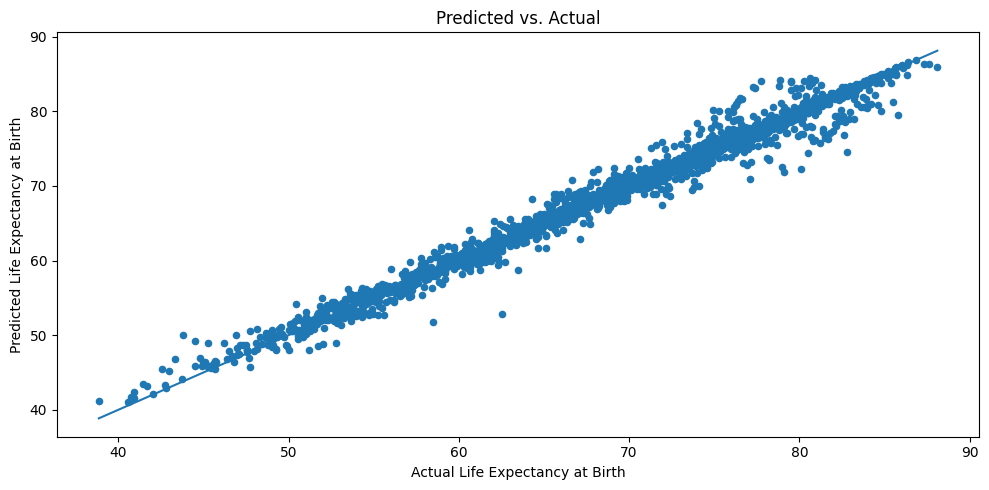

In [4]:
%%time
rfmodel1 = CallRF(npca_X_train, npca_X_test, npca_y_train, npca_y_test)

Mean Absolute Error: 1.2436301525998603

Mean Squared Error: 3.1328708144748796

Root Mean Squared Error: 1.7699917554821774
Mean Absolute Percentage Error (MAPE): 0.018474527316636465

Train Score: 0.9934150490499373 		 Test Score: 0.9657536264448617
   actual  predicted_prob
0  72.299       72.073520
1  54.557       54.607493
2  83.200       83.181170
3  62.117       59.977765
4  50.592       56.357990
5  53.673       53.335700
6  73.145       73.056550
7  64.282       65.572037
8  71.551       71.224039
9  58.174       57.455240
CPU times: total: 5.11 s
Wall time: 5.14 s


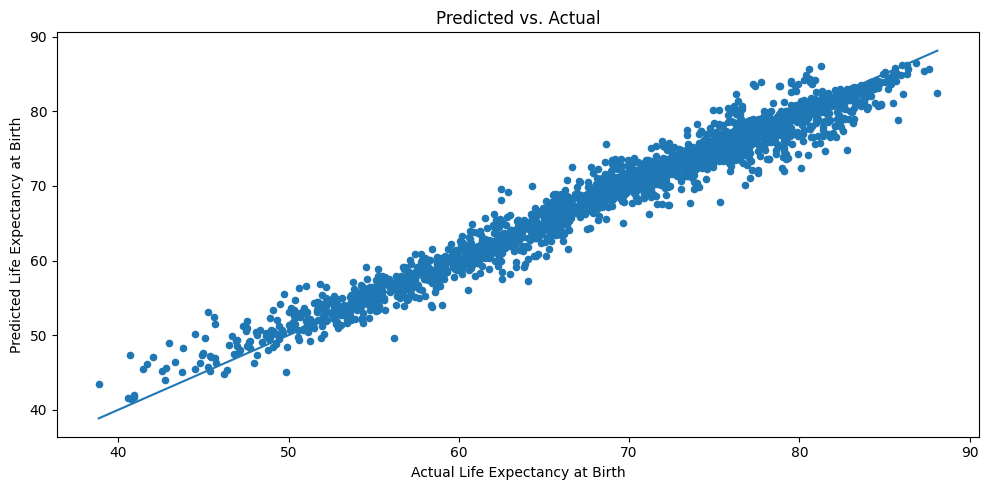

In [5]:
%%time
rfmodel2 = CallRF(X_train, X_test, y_train, y_test)

## Hyperparameter tuning using RandomizedSearchCV

In [6]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [7]:
def CallRandomizedSearch(X_train, y_train):
    rf_random = RandomizedSearchCV(estimator = RandomForestRegressor(),param_distributions = random_grid, 
                               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
    rf_random.fit(X_train, y_train.ravel())

    #print ('Random grid: ', random_grid, '\n')
    # print the best parameters
    print ('Best Parameters: ', rf_random.best_params_, ' \n')
    return rf_random.best_params_

In [8]:
%%time
npca_param = CallRandomizedSearch(npca_X_train, npca_y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Sakshi Kumari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
235 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
78 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sakshi Kumari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sakshi Kumari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Sakshi Kumari\AppData\Local\Programs\Python\Python311

Best Parameters:  {'n_estimators': 100, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}  

CPU times: total: 3.59 s
Wall time: 36.7 s


In [9]:
%%time
param = CallRandomizedSearch(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Sakshi Kumari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
235 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
170 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sakshi Kumari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sakshi Kumari\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\Sakshi Kumari\AppData\Local\Programs\Python\Python31

Best Parameters:  {'n_estimators': 50, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 40, 'bootstrap': False}  

CPU times: total: 2.41 s
Wall time: 31.7 s


## Using the best parameters

Mean Absolute Error: 0.7544090336594564

Mean Squared Error: 1.3999153645412397

Root Mean Squared Error: 1.1831801910703372
Mean Absolute Percentage Error (MAPE): 0.011070688540743088

Train Score: 0.9954945715360979 		 Test Score: 0.984697094978143
   actual  predicted_prob
0  72.299       72.184162
1  54.557       55.033155
2  83.200       83.039915
3  62.117       61.081686
4  50.592       51.654133
5  53.673       53.693570
6  73.145       73.132573
7  64.282       64.861660
8  71.551       71.264855
9  58.174       57.916370
CPU times: total: 2.45 s
Wall time: 2.6 s


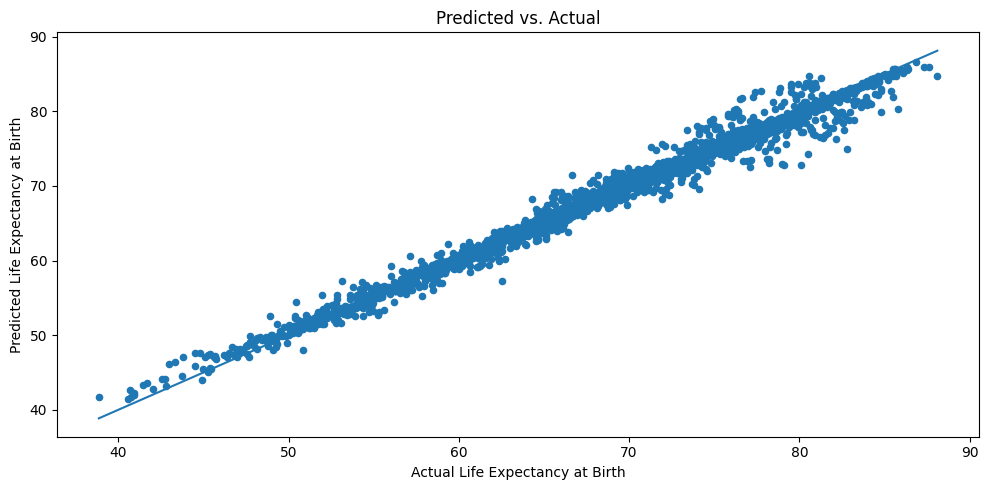

In [10]:
%%time
rfmodel3 = CallRF(npca_X_train, npca_X_test, npca_y_train, npca_y_test, npca_param)

Mean Absolute Error: 1.206642391314577

Mean Squared Error: 3.1371651842946737

Root Mean Squared Error: 1.7712044445220527
Mean Absolute Percentage Error (MAPE): 0.0178724837303045

Train Score: 0.996819764775665 		 Test Score: 0.965706683368769
   actual  predicted_prob
0  72.299       72.543240
1  54.557       54.637284
2  83.200       83.292023
3  62.117       60.467747
4  50.592       55.686144
5  53.673       53.651865
6  73.145       73.483671
7  64.282       65.082852
8  71.551       71.078456
9  58.174       57.199724
CPU times: total: 1.45 s
Wall time: 1.55 s


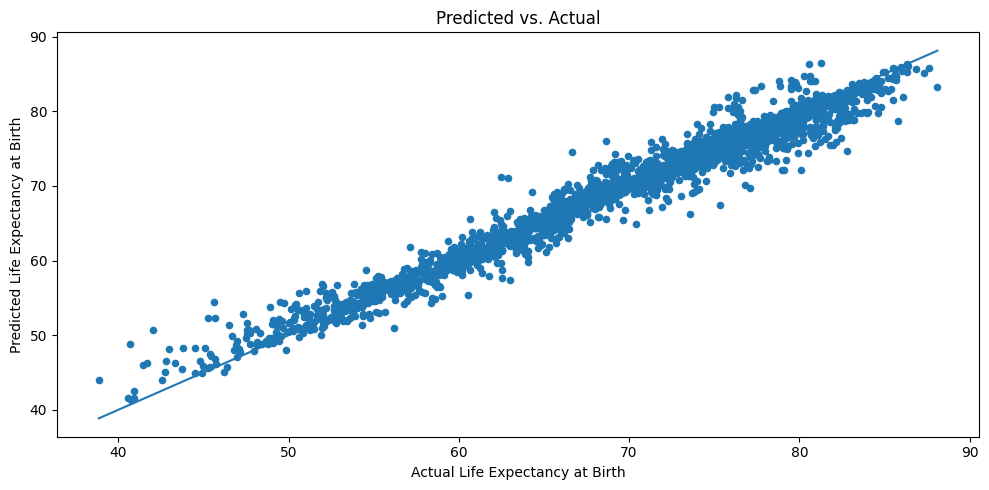

In [11]:
%%time
rfmodel4 = CallRF(X_train, X_test, y_train, y_test, param)

### Let's view the impact of features on best performing model

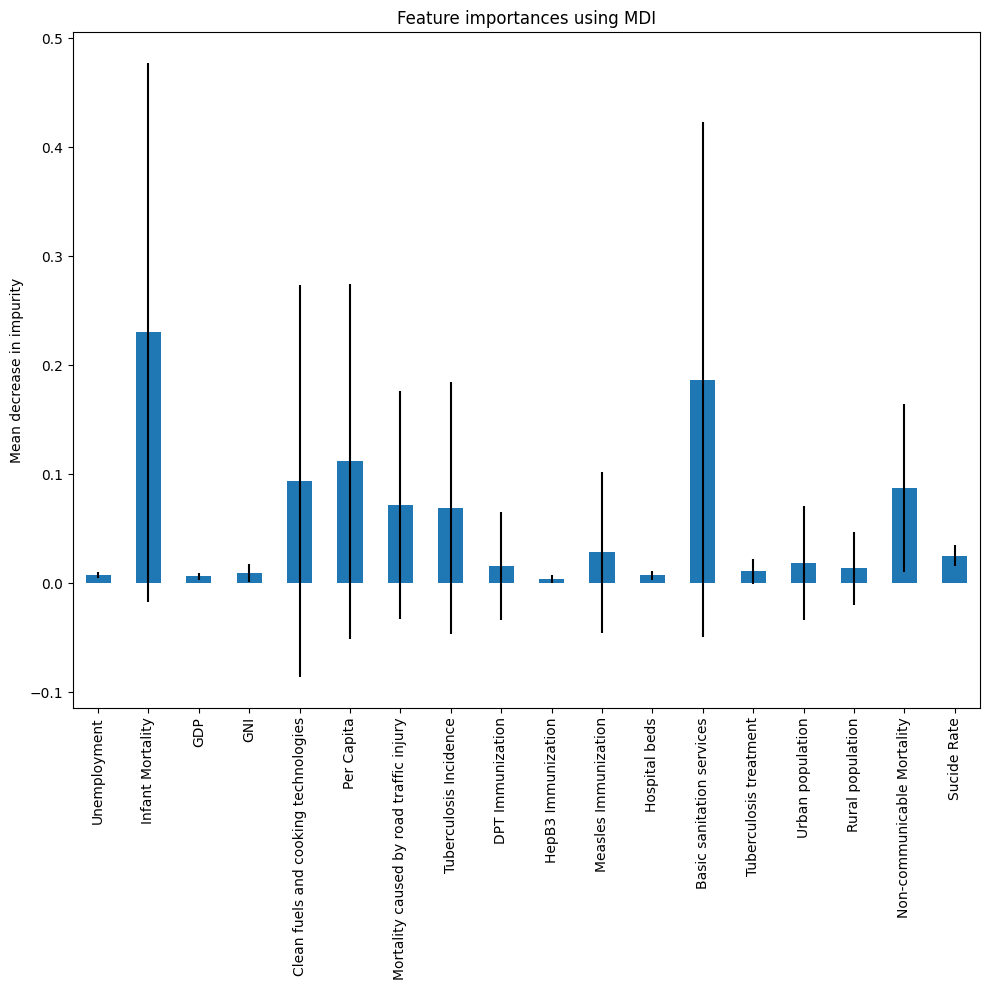

In [12]:
importances = rfmodel3.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfmodel3.estimators_], axis=0)

forest_importances = pd.Series(importances, index=column_name)

fig, ax = plt.subplots(figsize = (10, 10))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()